## Importing lmportant library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

## Loading Dataset 

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Earthquake type prediction\database.csv")

In [3]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

## Preprocessing 

In [5]:
data = data.drop('ID', axis=1)

In [6]:
data.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
null_columns = data.loc[:, data.isna().sum() > 0.66 * data.shape[0]].columns

In [8]:
data = data.drop(null_columns, axis=1)

In [9]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [10]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [11]:
data = data.dropna(axis=0).reset_index(drop=True)

In [12]:
data.isna().sum().sum()

0

## Feature Engineering 

In [13]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


In [14]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data['Year'] = data['Date'].apply(lambda x: x[-4:])

data = data.drop('Date', axis=1)

In [15]:
data['Month'] = data['Month'].astype(np.int)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\4024395465.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Month'] = data['Month'].astype(np.int)


In [16]:
data[data['Year'].str.contains('Z')]

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year
3378,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,US,US,US,Reviewed,19,000Z
7510,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,US,US,HRV,Reviewed,19,530Z
20647,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,US,US,GCMT,Reviewed,20,520Z


In [17]:
invalid_year_indices = data[data['Year'].str.contains('Z')].index

data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

In [18]:
data['Year'] = data['Year'].astype(np.int)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\2594260550.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Year'].astype(np.int)


In [19]:
data['Hour'] = data['Time'].apply(lambda x: np.int(x[0:2]))

data = data.drop('Time', axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\4102483338.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Hour'] = data['Time'].apply(lambda x: np.int(x[0:2]))


In [20]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22


In [21]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [22]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

## Data Visualization

In [23]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']

In [24]:
corr = data[numeric_columns].corr()

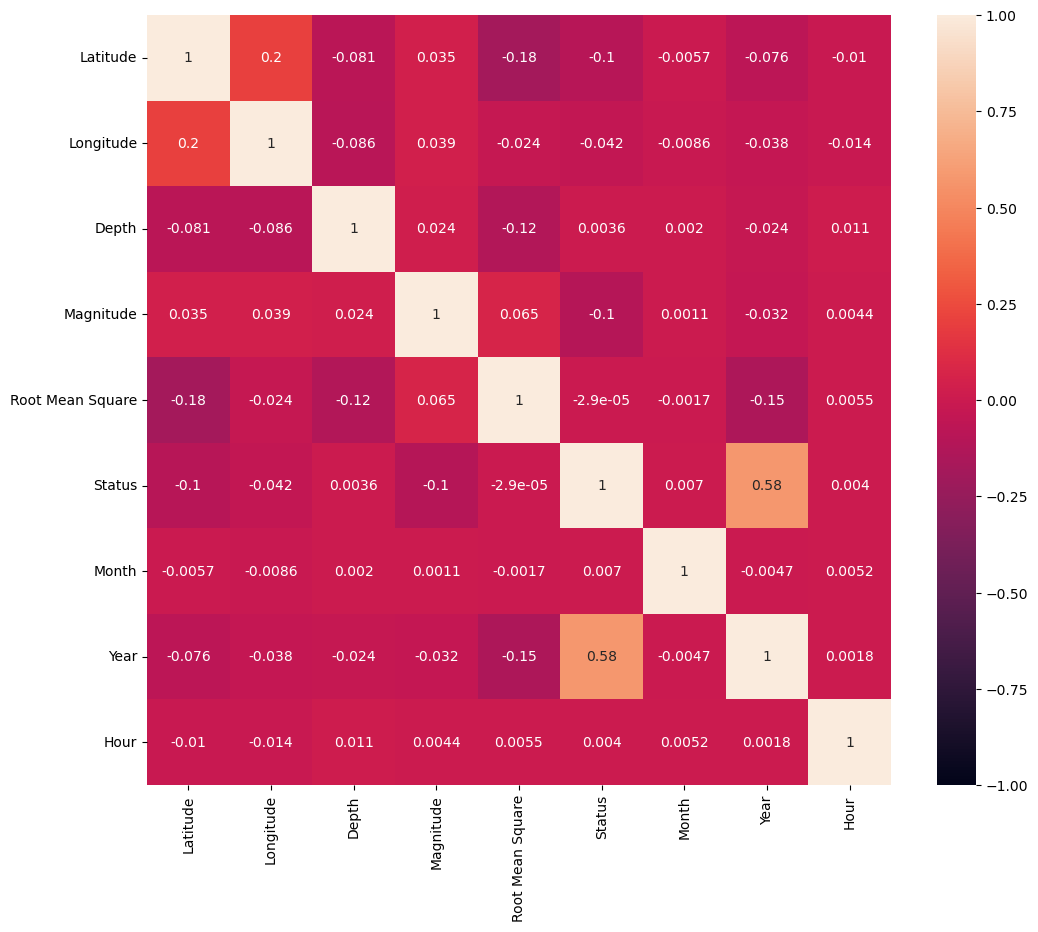

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [26]:
numeric_columns.remove('Status')

In [27]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3958621787.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0

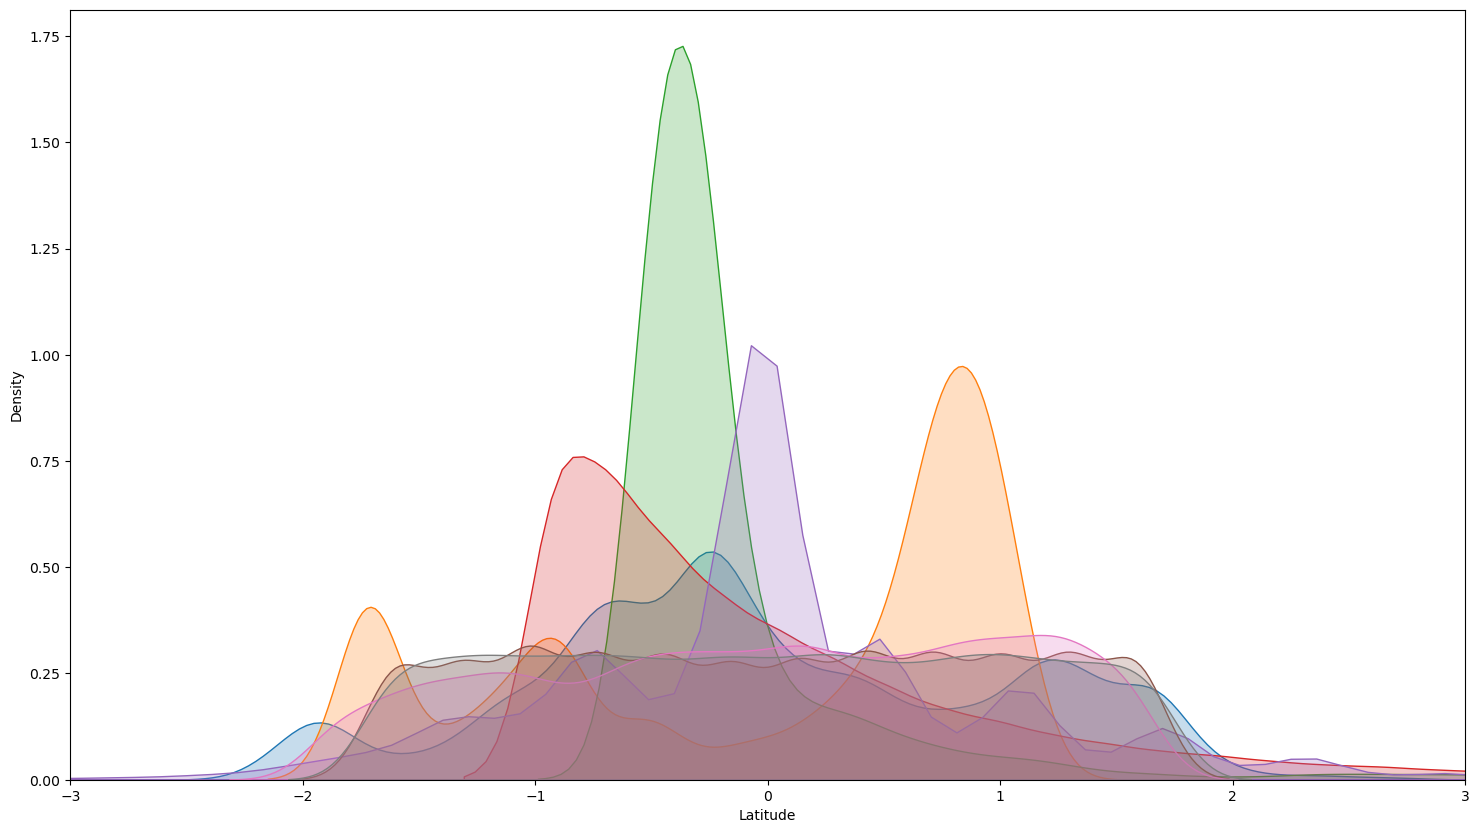

In [28]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True)
plt.xlim(-3, 3)
plt.show()

In [29]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,2016,22


## Encoding

In [30]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [31]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [32]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['t', 'mt', 's', 'ls', 'ms']
)

In [33]:
data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,t_Earthquake,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,1,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,1,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,1,...,1,0,0,0,0,0,0,0,0,0
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,1,...,1,0,0,0,0,0,0,0,0,0
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,1,...,0,0,0,0,0,0,1,0,0,0
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,1,...,0,0,0,0,0,0,1,0,0,0


## Splitting and scailing

In [34]:
y = data.loc[:, 'Status']
X = data.drop('Status', axis=1)

In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

## Modeling and Training 

In [37]:
X.shape

(23406, 104)

In [38]:
y.mean()

0.88737930445185

In [39]:
inputs = tf.keras.Input(shape=(104,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

## Results

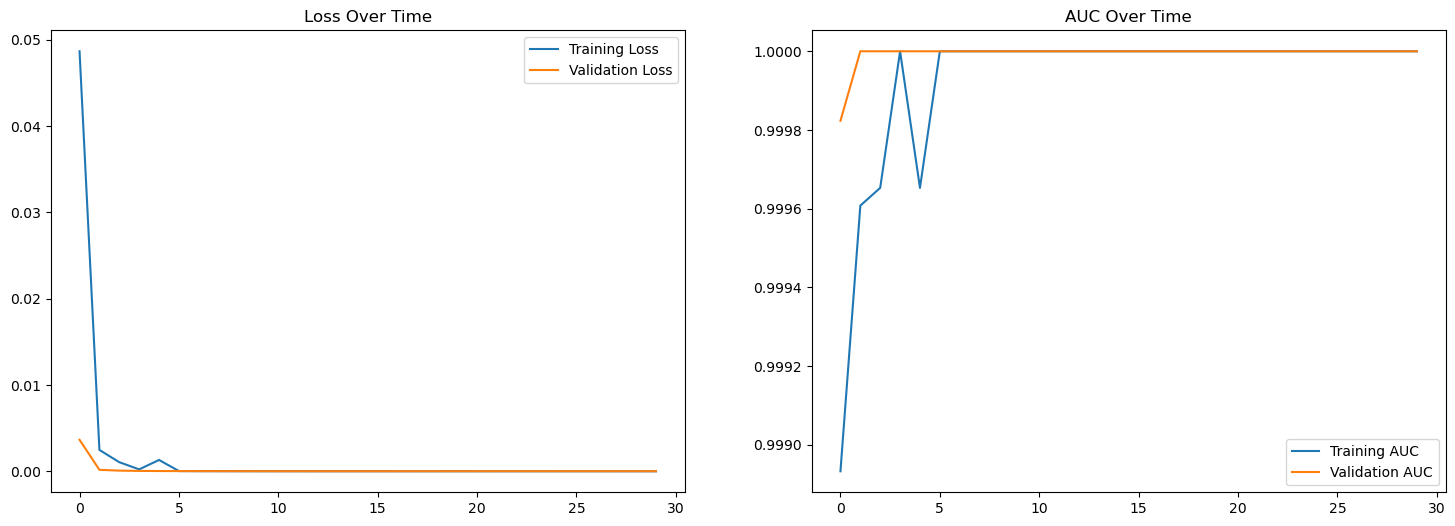

In [40]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("AUC Over Time")

plt.show()

In [41]:
model.evaluate(X_test, y_test)

220/220 [==============================] - 0s 2ms/step - loss: 3.6453e-05 - auc: 1.0000


[3.645335527835414e-05, 1.0]

In [45]:
y_probs = model.predict(X_test)

220/220 [==============================] - 0s 1ms/step


In [46]:
y_pred = np.argmax(y_probs, axis=1)

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      1.00      0.20       799
           1       0.00      0.00      0.00      6223

    accuracy                           0.11      7022
   macro avg       0.06      0.50      0.10      7022
weighted avg       0.01      0.11      0.02      7022



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
